In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
#from oe_acute import pyMNE

In [2]:
os.nice(1)

1

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/avgn_model/B1240/32x32/stim_resp_32x32_64/enc_test_64.npy')
stim_resp = np.load('/mnt/cube/srrudrar/avgn_model/B1240/32x32/stim_resp_32x32_64/resp_test_64.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((5706, 64), (5706, 214, 32))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=64, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 64

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((5706, 64), (5706, 214))

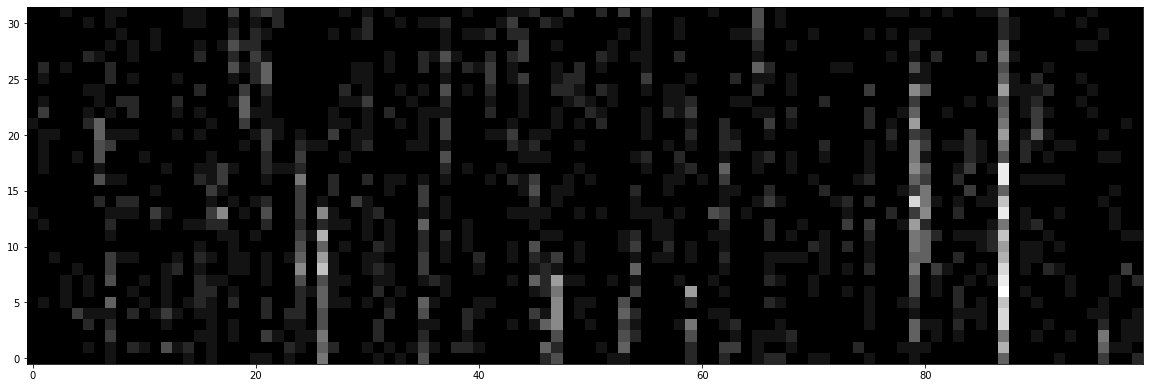

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/avgn_model/B1240/32x32/stim_resp_32x32_64/test_set_mne/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 64
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.148054
    2       0    0.142083
    3       0    0.139910
    4       0    0.139701
    5       0    0.140294
    6       1    0.139866
    7       2    0.138853
    8       0    0.138834
    9       0    0.134274
   10       0    0.133155
   11       0    0.132694
   12       0    0.134137
   13       1    0.134728
   14       2    0.133330
   15       3    0.134152
   16       4    0.134708
   17       5    0.135595
   18       6    0.136570
   19       7    0.137676
   20       8    0.138052
   21       9    0.138898
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.160987
    2       0    0.155606
    3       0    0.152095
    4       0    0.150606
    5       0    0.150247
    6       0    0.152157
    7       1    0.152670
    8       2    0.152522
    9       3    0.149936
   10       0    0.149682
   11       0    0.150274
   12       1    0.150431
   13       2    0.151129
   14       3    0.150301
   15       

   18       1    0.103429
   19       2    0.103190
   20       3    0.103230
   21       4    0.102813
   22       5    0.103055
   23       6    0.103057
   24       7    0.103291
   25       8    0.103217
   26       9    0.103403
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.105722
    2       0    0.102651
    3       0    0.100816
    4       0    0.099727
    5       0    0.099313
    6       0    0.098693
    7       0    0.098682
    8       0    0.098262
    9       0    0.097901
   10       0    0.097519
   11       0    0.097357
   12       0    0.097267
   13       0    0.097443
   14       1    0.097540
   15       2    0.097490
   16       3    0.097372
   17       4    0.097330
   18       5    0.097201
   19       0    0.097002
   20       0    0.097077
   21       1    0.097165
   22       2    0.097088
   23       3    0.097226
   24       4    0.097525
   25       5    0.097579
   26       6    0.097293
   27       7    0.097284
   28       

   10       3    0.093302
   11       4    0.094282
   12       5    0.095431
   13       6    0.096057
   14       7    0.095402
   15       8    0.095309
   16       9    0.095543
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.123650
    2       0    0.119356
    3       0    0.115973
    4       0    0.116891
    5       1    0.118060
    6       2    0.116878
    7       3    0.116689
    8       4    0.116197
    9       5    0.115940
   10       0    0.115776
   11       0    0.116253
   12       1    0.115912
   13       2    0.115723
   14       0    0.116138
   15       1    0.117706
   16       2    0.118767
   17       3    0.118503
   18       4    0.118590
   19       5    0.118887
   20       6    0.119233
   21       7    0.119292
   22       8    0.119327
   23       9    0.119320
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.112405
    2       0    0.107190
    3       0    0.104878
    4       0    0.102887
    5       

    5       0    0.294290
    6       1    0.290888
    7       0    0.290914
    8       1    0.291891
    9       2    0.294158
   10       3    0.292962
   11       4    0.294554
   12       5    0.294464
   13       6    0.295363
   14       7    0.294622
   15       8    0.294640
   16       9    0.294288
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.302422
    2       0    0.292289
    3       0    0.289677
    4       0    0.286317
    5       0    0.282152
    6       0    0.280267
    7       0    0.280832
    8       1    0.280503
    9       2    0.280720
   10       3    0.279386
   11       0    0.278706
   12       0    0.278318
   13       0    0.278543
   14       1    0.278769
   15       2    0.279626
   16       3    0.279242
   17       4    0.278552
   18       5    0.278617
   19       6    0.278753
   20       7    0.279253
   21       8    0.280013
   22       9    0.281201
minimum of test set found
Iters   tally   ll(test) 
    1       

    2       0    0.612571
    3       0    0.608901
    4       0    0.608321
    5       0    0.608975
    6       1    0.608917
    7       2    0.608167
    8       0    0.607807
    9       0    0.607859
   10       1    0.607955
   11       2    0.607406
   12       0    0.607191
   13       0    0.607341
   14       1    0.607906
   15       2    0.609122
   16       3    0.610434
   17       4    0.610937
   18       5    0.611508
   19       6    0.611270
   20       7    0.611423
   21       8    0.611778
   22       9    0.611716
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.618090
    2       0    0.615037
    3       0    0.612921
    4       0    0.612372
    5       0    0.611272
    6       0    0.611250
    7       0    0.611493
    8       1    0.611118
    9       0    0.610966
   10       0    0.612878
   11       1    0.613269
   12       2    0.613386
   13       3    0.613334
   14       4    0.613257
   15       5    0.613001
   16       

   13       2    0.440151
   14       3    0.441715
   15       4    0.443539
   16       5    0.445069
   17       6    0.446328
   18       7    0.446609
   19       8    0.447183
   20       9    0.447102
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.445988
    2       0    0.442912
    3       0    0.440841
    4       0    0.439138
    5       0    0.437776
    6       0    0.437756
    7       0    0.437118
    8       0    0.437219
    9       1    0.436725
   10       0    0.437024
   11       1    0.437479
   12       2    0.437383
   13       3    0.436727
   14       4    0.436753
   15       5    0.437213
   16       6    0.437851
   17       7    0.439033
   18       8    0.439801
   19       9    0.439238
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.436882
    2       0    0.434421
    3       0    0.431564
    4       0    0.431155
    5       0    0.430209
    6       0    0.429556
    7       0    0.428332
    8       

   19       7    0.105177
   20       8    0.105167
   21       9    0.105256
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.100241
    2       0    0.099863
    3       0    0.098943
    4       0    0.099705
    5       1    0.098593
    6       0    0.095840
    7       0    0.095443
    8       0    0.095331
    9       0    0.094981
   10       0    0.094386
   11       0    0.094378
   12       0    0.093623
   13       0    0.093918
   14       1    0.094285
   15       2    0.094531
   16       3    0.095551
   17       4    0.096841
   18       5    0.097194
   19       6    0.096615
   20       7    0.096197
   21       8    0.096154
   22       9    0.096159
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.100120
    2       0    0.095399
    3       0    0.093863
    4       0    0.093887
    5       1    0.092269
    6       0    0.091376
    7       0    0.091524
    8       1    0.091322
    9       0    0.091050
   10       

   21       6    0.051054
   22       7    0.051329
   23       8    0.051566
   24       9    0.051679
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.292599
    2       0    0.289380
    3       0    0.290025
    4       1    0.283936
    5       0    0.280241
    6       0    0.280100
    7       0    0.280722
    8       1    0.279994
    9       0    0.283193
   10       1    0.282600
   11       2    0.281422
   12       3    0.280681
   13       4    0.280965
   14       5    0.280324
   15       6    0.279930
   16       0    0.280251
   17       1    0.280273
   18       2    0.279974
   19       3    0.281442
   20       4    0.283139
   21       5    0.283045
   22       6    0.284335
   23       7    0.284497
   24       8    0.285345
   25       9    0.285455
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.311370
    2       0    0.310178
    3       0    0.302722
    4       0    0.300496
    5       0    0.299107
    6       

    1       0    0.424791
    2       0    0.416097
    3       0    0.409765
    4       0    0.408280
    5       0    0.407279
    6       0    0.404627
    7       0    0.403653
    8       0    0.403409
    9       0    0.403628
   10       1    0.403943
   11       2    0.403784
   12       3    0.404056
   13       4    0.403845
   14       5    0.403958
   15       6    0.404568
   16       7    0.405669
   17       8    0.405489
   18       9    0.405003
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.427198
    2       0    0.422480
    3       0    0.419071
    4       0    0.416100
    5       0    0.414982
    6       0    0.415124
    7       1    0.415910
    8       2    0.413296
    9       0    0.410595
   10       0    0.410371
   11       0    0.410479
   12       1    0.410003
   13       0    0.409006
   14       0    0.408026
   15       0    0.407601
   16       0    0.408083
   17       1    0.408909
   18       2    0.409337
   19       

   15       8    0.113435
   16       9    0.113016
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.115752
    2       0    0.114101
    3       0    0.111101
    4       0    0.110312
    5       0    0.109849
    6       0    0.109847
    7       0    0.108394
    8       0    0.108537
    9       1    0.108990
   10       2    0.108821
   11       3    0.109539
   12       4    0.109914
   13       5    0.110768
   14       6    0.111573
   15       7    0.111960
   16       8    0.111632
   17       9    0.111908
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.118028
    2       0    0.114419
    3       0    0.114514
    4       1    0.114183
    5       0    0.113740
    6       0    0.111810
    7       0    0.111715
    8       0    0.111851
    9       1    0.111386
   10       0    0.111878
   11       1    0.112483
   12       2    0.112227
   13       3    0.112862
   14       4    0.115976
   15       5    0.116889
   16       

    5       0    0.156114
    6       0    0.158043
    7       1    0.157470
    8       2    0.154781
    9       0    0.155213
   10       1    0.154627
   11       0    0.153697
   12       0    0.154267
   13       1    0.154167
   14       2    0.154396
   15       3    0.155257
   16       4    0.154830
   17       5    0.155837
   18       6    0.157774
   19       7    0.158632
   20       8    0.160751
   21       9    0.162710
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.169385
    2       0    0.171690
    3       0    0.170207
    4       0    0.165609
    5       0    0.164207
    6       0    0.163426
    7       0    0.162649
    8       0    0.162307
    9       0    0.162337
   10       1    0.163444
   11       2    0.163572
   12       3    0.163307
   13       4    0.163424
   14       5    0.163498
   15       6    0.164634
   16       7    0.164941
   17       8    0.165065
   18       9    0.166035
minimum of test set found
Iters   tall

    4       0    0.582289
    5       0    0.581922
    6       0    0.580060
    7       0    0.580175
    8       1    0.580862
    9       2    0.580530
   10       3    0.580444
   11       4    0.580643
   12       5    0.580104
   13       6    0.581275
   14       7    0.582349
   15       8    0.581887
   16       9    0.582319
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.196122
    2       0    0.190996
    3       0    0.188916
    4       0    0.186513
    5       0    0.186225
    6       0    0.184531
    7       0    0.183898
    8       0    0.183517
    9       0    0.182813
   10       0    0.184258
   11       1    0.186123
   12       2    0.186096
   13       3    0.187644
   14       4    0.191624
   15       5    0.194646
   16       6    0.195386
   17       7    0.196016
   18       8    0.197745
   19       9    0.198182
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.202473
    2       0    0.195262
    3       

    9       3    0.151529
   10       4    0.150103
   11       5    0.150137
   12       6    0.149461
   13       7    0.150453
   14       8    0.150613
   15       9    0.153119
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.151723
    2       0    0.147876
    3       0    0.148914
    4       1    0.153675
    5       2    0.147582
    6       0    0.145642
    7       0    0.145635
    8       0    0.145120
    9       0    0.145209
   10       1    0.146371
   11       2    0.146748
   12       3    0.146514
   13       4    0.146349
   14       5    0.146328
   15       6    0.146673
   16       7    0.147186
   17       8    0.147368
   18       9    0.147549
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.145303
    2       0    0.141940
    3       0    0.138593
    4       0    0.137047
    5       0    0.136339
    6       0    0.136268
    7       0    0.136860
    8       1    0.137270
    9       2    0.137738
   10       

   17       7    0.633092
   18       8    0.632966
   19       9    0.633120
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.637368
    2       0    0.631458
    3       0    0.630496
    4       0    0.629265
    5       0    0.627495
    6       0    0.625956
    7       0    0.626002
    8       1    0.627316
    9       2    0.627186
   10       3    0.627393
   11       4    0.627411
   12       5    0.626930
   13       6    0.626843
   14       7    0.627009
   15       8    0.626981
   16       9    0.626739
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.165262
    2       0    0.164487
    3       0    0.161755
    4       0    0.156959
    5       0    0.156452
    6       0    0.156511
    7       1    0.155613
    8       0    0.154536
    9       0    0.156254
   10       1    0.156116
   11       2    0.155013
   12       3    0.155093
   13       4    0.155219
   14       5    0.155044
   15       6    0.154509
   16       

   15       6    0.115786
   16       7    0.116064
   17       8    0.115746
   18       9    0.116600
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.140884
    2       0    0.141826
    3       0    0.138392
    4       0    0.133874
    5       0    0.129283
    6       0    0.129019
    7       0    0.129494
    8       1    0.128963
    9       0    0.128250
   10       0    0.127630
   11       0    0.127419
   12       0    0.127985
   13       1    0.128140
   14       2    0.127481
   15       3    0.127394
   16       0    0.128420
   17       1    0.129429
   18       2    0.129260
   19       3    0.129177
   20       4    0.130110
   21       5    0.131600
   22       6    0.132737
   23       7    0.133334
   24       8    0.133617
   25       9    0.133563
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.129365
    2       0    0.126859
    3       0    0.126011
    4       0    0.121945
    5       0    0.119474
    6       

    1       0    0.474124
    2       0    0.466385
    3       0    0.460584
    4       0    0.457951
    5       0    0.454899
    6       0    0.453782
    7       0    0.453210
    8       0    0.451375
    9       0    0.451152
   10       0    0.452693
   11       1    0.454065
   12       2    0.452599
   13       3    0.451028
   14       0    0.449700
   15       0    0.449305
   16       0    0.448756
   17       0    0.448782
   18       1    0.448600
   19       0    0.448584
   20       0    0.448670
   21       1    0.448686
   22       2    0.448624
   23       3    0.448911
   24       4    0.450815
   25       5    0.452136
   26       6    0.455222
   27       7    0.457903
   28       8    0.459642
   29       9    0.459593
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.482790
    2       0    0.476366
    3       0    0.472966
    4       0    0.467999
    5       0    0.466676
    6       0    0.464581
    7       0    0.464447
    8       

    2       0    0.671319
    3       0    0.666960
    4       0    0.664422
    5       0    0.662349
    6       0    0.662772
    7       1    0.663357
    8       2    0.662314
    9       0    0.661054
   10       0    0.663210
   11       1    0.663592
   12       2    0.663785
   13       3    0.664945
   14       4    0.666934
   15       5    0.667974
   16       6    0.667521
   17       7    0.667468
   18       8    0.667404
   19       9    0.667124
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.671476
    2       0    0.668822
    3       0    0.666650
    4       0    0.664880
    5       0    0.664164
    6       0    0.664823
    7       1    0.666763
    8       2    0.668338
    9       3    0.667587
   10       4    0.666738
   11       5    0.666390
   12       6    0.666437
   13       7    0.666429
   14       8    0.667717
   15       9    0.669641
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.669945
    2       

   17       3    0.226214
   18       4    0.226634
   19       5    0.226683
   20       6    0.226365
   21       7    0.226576
   22       8    0.227022
   23       9    0.227083
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.223365
    2       0    0.216343
    3       0    0.214771
    4       0    0.210123
    5       0    0.208728
    6       0    0.207546
    7       0    0.207556
    8       1    0.207714
    9       2    0.207322
   10       0    0.207479
   11       1    0.207936
   12       2    0.208306
   13       3    0.209033
   14       4    0.209359
   15       5    0.211053
   16       6    0.211372
   17       7    0.212466
   18       8    0.213541
   19       9    0.213575
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.238414
    2       0    0.231563
    3       0    0.230740
    4       0    0.226409
    5       0    0.228286
    6       1    0.225279
    7       0    0.225109
    8       0    0.223686
    9       

    2       0    0.538473
    3       0    0.535217
    4       0    0.534033
    5       0    0.533271
    6       0    0.532446
    7       0    0.533306
    8       1    0.533379
    9       2    0.532767
   10       3    0.532601
   11       4    0.532664
   12       5    0.532593
   13       6    0.532567
   14       7    0.532862
   15       8    0.533793
   16       9    0.534797
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.545231
    2       0    0.543625
    3       0    0.541109
    4       0    0.541107
    5       0    0.540392
    6       0    0.539267
    7       0    0.538835
    8       0    0.537930
    9       0    0.537308
   10       0    0.536950
   11       0    0.537377
   12       1    0.537392
   13       2    0.536516
   14       0    0.536633
   15       1    0.537703
   16       2    0.537713
   17       3    0.538113
   18       4    0.537995
   19       5    0.538117
   20       6    0.537948
   21       7    0.537977
   22       

   21       9    0.633301
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.651423
    2       0    0.646680
    3       0    0.641024
    4       0    0.640057
    5       0    0.638772
    6       0    0.637995
    7       0    0.637351
    8       0    0.637540
    9       1    0.636415
   10       0    0.635804
   11       0    0.635731
   12       0    0.635448
   13       0    0.635554
   14       1    0.635520
   15       2    0.636220
   16       3    0.636797
   17       4    0.637788
   18       5    0.638155
   19       6    0.638371
   20       7    0.638508
   21       8    0.638540
   22       9    0.638402
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.563712
    2       0    0.555245
    3       0    0.550900
    4       0    0.549335
    5       0    0.550366
    6       1    0.545252
    7       0    0.543732
    8       0    0.543088
    9       0    0.543739
   10       1    0.545127
   11       2    0.544111
   12       

    1       0    0.283364
    2       0    0.281955
    3       0    0.277851
    4       0    0.276395
    5       0    0.277888
    6       1    0.276703
    7       2    0.277397
    8       3    0.278428
    9       4    0.277367
   10       5    0.276034
   11       0    0.276130
   12       1    0.275404
   13       0    0.275219
   14       0    0.274685
   15       0    0.274792
   16       1    0.274756
   17       2    0.274950
   18       3    0.275853
   19       4    0.275935
   20       5    0.275698
   21       6    0.275700
   22       7    0.275977
   23       8    0.276629
   24       9    0.278022
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.267699
    2       0    0.269437
    3       0    0.270545
    4       1    0.265000
    5       0    0.261499
    6       0    0.259068
    7       0    0.258865
    8       0    0.258931
    9       1    0.259381
   10       2    0.260320
   11       3    0.262097
   12       4    0.263563
   13       

   16       7    0.303384
   17       8    0.304104
   18       9    0.303843
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.487125
    2       0    0.480904
    3       0    0.476447
    4       0    0.476020
    5       0    0.473762
    6       0    0.474833
    7       1    0.473138
    8       0    0.472657
    9       0    0.471624
   10       0    0.472060
   11       1    0.471799
   12       2    0.471241
   13       0    0.471221
   14       0    0.471059
   15       0    0.470588
   16       0    0.470732
   17       1    0.470927
   18       2    0.470677
   19       3    0.471095
   20       4    0.471131
   21       5    0.470799
   22       6    0.471012
   23       7    0.471906
   24       8    0.473832
   25       9    0.475603
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.474102
    2       0    0.467663
    3       0    0.463920
    4       0    0.463222
    5       0    0.461526
    6       0    0.460321
    7       

   14       8    0.179435
   15       9    0.180023
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.203962
    2       0    0.198381
    3       0    0.199349
    4       1    0.198202
    5       0    0.196812
    6       0    0.194632
    7       0    0.195880
    8       1    0.195664
    9       2    0.195346
   10       3    0.195414
   11       4    0.195899
   12       5    0.195924
   13       6    0.196420
   14       7    0.199423
   15       8    0.200260
   16       9    0.200916
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.233508
    2       0    0.232928
    3       0    0.233384
    4       1    0.231401
    5       0    0.228325
    6       0    0.228905
    7       1    0.227791
    8       0    0.226492
    9       0    0.227286
   10       1    0.227878
   11       2    0.227384
   12       3    0.229303
   13       4    0.229089
   14       5    0.227642
   15       6    0.228081
   16       7    0.227802
   17       

    7       0    0.234988
    8       1    0.235249
    9       2    0.235094
   10       3    0.234773
   11       0    0.234596
   12       0    0.236306
   13       1    0.237353
   14       2    0.237745
   15       3    0.238751
   16       4    0.238919
   17       5    0.239183
   18       6    0.239538
   19       7    0.239120
   20       8    0.238666
   21       9    0.238489
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.241175
    2       0    0.240576
    3       0    0.240103
    4       0    0.238031
    5       0    0.237752
    6       0    0.237467
    7       0    0.238086
    8       1    0.237935
    9       2    0.238002
   10       3    0.237853
   11       4    0.238131
   12       5    0.238658
   13       6    0.238526
   14       7    0.238730
   15       8    0.238651
   16       9    0.238536
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.242432
    2       0    0.242467
    3       0    0.242696
    4       

   13       0    0.637164
   14       1    0.637180
   15       2    0.637454
   16       3    0.637972
   17       4    0.638942
   18       5    0.640154
   19       6    0.639897
   20       7    0.639656
   21       8    0.639750
   22       9    0.639950
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.647787
    2       0    0.645673
    3       0    0.641822
    4       0    0.642601
    5       1    0.642511
    6       2    0.643551
    7       3    0.641833
    8       4    0.641223
    9       0    0.640895
   10       0    0.640595
   11       0    0.640196
   12       0    0.640199
   13       1    0.640211
   14       2    0.640082
   15       0    0.639740
   16       0    0.639544
   17       0    0.640914
   18       1    0.641692
   19       2    0.641771
   20       3    0.641848
   21       4    0.641914
   22       5    0.642356
   23       6    0.643144
   24       7    0.643396
   25       8    0.643294
   26       9    0.643335
minimum of t

   21       5    0.188869
   22       6    0.189075
   23       7    0.188854
   24       8    0.188804
   25       9    0.188986
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.215755
    2       0    0.212589
    3       0    0.210785
    4       0    0.209589
    5       0    0.209598
    6       1    0.209179
    7       0    0.207205
    8       0    0.206808
    9       0    0.207805
   10       1    0.207768
   11       2    0.207560
   12       3    0.206951
   13       4    0.207089
   14       5    0.207030
   15       6    0.206923
   16       7    0.207016
   17       8    0.207115
   18       9    0.207315
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.238697
    2       0    0.235739
    3       0    0.226789
    4       0    0.226302
    5       0    0.224869
    6       0    0.223869
    7       0    0.223815
    8       0    0.223681
    9       0    0.223459
   10       0    0.225527
   11       1    0.226669
   12       

    1       0    0.084458
    2       0    0.083760
    3       0    0.081648
    4       0    0.079383
    5       0    0.079247
    6       0    0.078932
    7       0    0.079076
    8       1    0.079531
    9       2    0.080117
   10       3    0.079601
   11       4    0.079730
   12       5    0.079563
   13       6    0.079614
   14       7    0.079781
   15       8    0.079601
   16       9    0.079636
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.548592
    2       0    0.542368
    3       0    0.537922
    4       0    0.536381
    5       0    0.534293
    6       0    0.533403
    7       0    0.533046
    8       0    0.531976
    9       0    0.530895
   10       0    0.530722
   11       0    0.530359
   12       0    0.530356
   13       0    0.530379
   14       1    0.530171
   15       0    0.530038
   16       0    0.529768
   17       0    0.529790
   18       1    0.529758
   19       0    0.529672
   20       0    0.529993
   21       

    2       0    0.275345
    3       0    0.270089
    4       0    0.267368
    5       0    0.266762
    6       0    0.265690
    7       0    0.265146
    8       0    0.265168
    9       1    0.264681
   10       0    0.264032
   11       0    0.264147
   12       1    0.264090
   13       2    0.263640
   14       0    0.263757
   15       1    0.263758
   16       2    0.263596
   17       0    0.263873
   18       1    0.264398
   19       2    0.265486
   20       3    0.265357
   21       4    0.265891
   22       5    0.266270
   23       6    0.266123
   24       7    0.266364
   25       8    0.266607
   26       9    0.266786
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.443437
    2       0    0.439545
    3       0    0.437362
    4       0    0.436367
    5       0    0.435136
    6       0    0.435745
    7       1    0.435158
    8       2    0.436082
    9       3    0.438342
   10       4    0.436614
   11       5    0.436016
   12       

   21       9    0.095216
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091410
    2       0    0.092682
    3       0    0.093782
    4       1    0.091942
    5       0    0.090810
    6       0    0.089793
    7       0    0.089812
    8       1    0.090769
    9       2    0.090821
   10       3    0.091181
   11       4    0.090866
   12       5    0.090450
   13       6    0.090409
   14       7    0.090547
   15       8    0.090579
   16       9    0.090902
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091846
    2       0    0.090613
    3       0    0.088602
    4       0    0.084430
    5       0    0.084106
    6       0    0.083738
    7       0    0.083034
    8       0    0.082546
    9       0    0.082032
   10       0    0.082279
   11       1    0.083371
   12       2    0.083850
   13       3    0.082971
   14       4    0.082830
   15       5    0.082872
   16       6    0.082922
   17       7    0.083047
   18       

   18       5    0.171766
   19       6    0.171635
   20       7    0.171939
   21       8    0.172924
   22       9    0.173536
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.179604
    2       0    0.181085
    3       0    0.181196
    4       1    0.177389
    5       0    0.177078
    6       0    0.176632
    7       0    0.179262
    8       1    0.179881
    9       2    0.178043
   10       3    0.178509
   11       4    0.178640
   12       5    0.178678
   13       6    0.179061
   14       7    0.179040
   15       8    0.179240
   16       9    0.179679
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.172964
    2       0    0.167686
    3       0    0.166703
    4       0    0.165799
    5       0    0.165360
    6       0    0.165203
    7       0    0.165805
    8       1    0.166513
    9       2    0.167851
   10       3    0.167554
   11       4    0.167157
   12       5    0.167567
   13       6    0.167651
   14       

    2       0    0.253060
    3       0    0.252265
    4       0    0.253909
    5       1    0.255972
    6       2    0.255934
    7       3    0.254917
    8       4    0.254311
    9       5    0.251822
   10       0    0.251288
   11       0    0.251288
   12       0    0.252348
   13       1    0.252445
   14       2    0.252765
   15       3    0.253326
   16       4    0.252853
   17       5    0.253011
   18       6    0.253129
   19       7    0.253443
   20       8    0.253596
   21       9    0.253930
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.267375
    2       0    0.267603
    3       0    0.265888
    4       0    0.264084
    5       0    0.263040
    6       0    0.263994
    7       1    0.265011
    8       2    0.266161
    9       3    0.266656
   10       4    0.267204
   11       5    0.268430
   12       6    0.270238
   13       7    0.270862
   14       8    0.270475
   15       9    0.270799
minimum of test set found
Iters   tall

   19       6    0.413476
   20       7    0.414853
   21       8    0.414553
   22       9    0.415284
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.443911
    2       0    0.433662
    3       0    0.431386
    4       0    0.428109
    5       0    0.426831
    6       0    0.426485
    7       0    0.425194
    8       0    0.422961
    9       0    0.422601
   10       0    0.423510
   11       1    0.424462
   12       2    0.425198
   13       3    0.424956
   14       4    0.426230
   15       5    0.426728
   16       6    0.427327
   17       7    0.427410
   18       8    0.427975
   19       9    0.428035
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.515036
    2       0    0.502481
    3       0    0.498937
    4       0    0.496981
    5       0    0.491662
    6       0    0.488566
    7       0    0.485628
    8       0    0.483310
    9       0    0.482868
   10       0    0.481739
   11       0    0.481916
   12       

   18       4    0.477179
   19       5    0.477140
   20       6    0.476315
   21       7    0.475978
   22       8    0.476359
   23       9    0.476453
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.482895
    2       0    0.479928
    3       0    0.475318
    4       0    0.473529
    5       0    0.471740
    6       0    0.473458
    7       1    0.475138
    8       2    0.473102
    9       3    0.471853
   10       4    0.470841
   11       0    0.470887
   12       1    0.471318
   13       2    0.471334
   14       3    0.470845
   15       4    0.470764
   16       0    0.471172
   17       1    0.470919
   18       2    0.472121
   19       3    0.473673
   20       4    0.474852
   21       5    0.475447
   22       6    0.474426
   23       7    0.474608
   24       8    0.475552
   25       9    0.475546
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.143220
    2       0    0.141546
    3       0    0.142952
    4       

   11       4    0.075630
   12       5    0.076819
   13       6    0.076746
   14       7    0.076179
   15       8    0.076341
   16       9    0.076161
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.066379
    2       0    0.064503
    3       0    0.063783
    4       0    0.065080
    5       1    0.067264
    6       2    0.069862
    7       3    0.069955
    8       4    0.068768
    9       5    0.068791
   10       6    0.068916
   11       7    0.068547
   12       8    0.068619
   13       9    0.068944
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.061311
    2       0    0.059914
    3       0    0.059063
    4       0    0.058849
    5       0    0.059981
    6       1    0.060954
    7       2    0.059736
    8       3    0.059580
    9       4    0.059437
   10       5    0.059414
   11       6    0.058783
   12       0    0.058615
   13       0    0.058413
   14       0    0.058355
   15       0    0.058843
   16       

Iters   tally   ll(test) 
    1       0    0.653811
    2       0    0.652210
    3       0    0.651520
    4       0    0.650327
    5       0    0.648736
    6       0    0.650104
    7       1    0.650314
    8       2    0.650924
    9       3    0.649381
   10       4    0.648454
   11       0    0.648393
   12       0    0.648972
   13       1    0.649944
   14       2    0.651103
   15       3    0.650953
   16       4    0.651483
   17       5    0.651671
   18       6    0.651835
   19       7    0.652363
   20       8    0.652749
   21       9    0.653002
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.647714
    2       0    0.644649
    3       0    0.642553
    4       0    0.641336
    5       0    0.640608
    6       0    0.640478
    7       0    0.641210
    8       1    0.640597
    9       2    0.641179
   10       3    0.641471
   11       4    0.640851
   12       5    0.641015
   13       6    0.641048
   14       7    0.641281
   15       

    1       0    0.589863
    2       0    0.586481
    3       0    0.579856
    4       0    0.577736
    5       0    0.578567
    6       1    0.575442
    7       0    0.575284
    8       0    0.574570
    9       0    0.574151
   10       0    0.574290
   11       1    0.574986
   12       2    0.576038
   13       3    0.575133
   14       4    0.574451
   15       5    0.574522
   16       6    0.574541
   17       7    0.574884
   18       8    0.575621
   19       9    0.576715
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.225562
    2       0    0.220682
    3       0    0.213068
    4       0    0.213693
    5       1    0.208771
    6       0    0.209627
    7       1    0.208678
    8       0    0.210177
    9       1    0.209510
   10       2    0.209780
   11       3    0.210696
   12       4    0.215351
   13       5    0.218425
   14       6    0.220909
   15       7    0.222438
   16       8    0.222347
   17       9    0.222245
minimum of t

   15       6    0.482326
   16       7    0.481576
   17       8    0.481544
   18       9    0.481401
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.487352
    2       0    0.481543
    3       0    0.479613
    4       0    0.475843
    5       0    0.473616
    6       0    0.473364
    7       0    0.471976
    8       0    0.470964
    9       0    0.471128
   10       1    0.470771
   11       0    0.471123
   12       1    0.471461
   13       2    0.470834
   14       3    0.471098
   15       4    0.473948
   16       5    0.477948
   17       6    0.479509
   18       7    0.480059
   19       8    0.480321
   20       9    0.479694
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.217866
    2       0    0.216834
    3       0    0.215375
    4       0    0.213104
    5       0    0.213467
    6       1    0.213813
    7       2    0.214231
    8       3    0.214308
    9       4    0.214055
   10       5    0.213974
   11       

   11       1    0.431793
   12       2    0.432346
   13       3    0.432953
   14       4    0.434040
   15       5    0.438724
   16       6    0.446007
   17       7    0.447177
   18       8    0.447135
   19       9    0.446873
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.446963
    2       0    0.446048
    3       0    0.446318
    4       1    0.442541
    5       0    0.441484
    6       0    0.440400
    7       0    0.439796
    8       0    0.439744
    9       0    0.440913
   10       1    0.441869
   11       2    0.440655
   12       3    0.440756
   13       4    0.441378
   14       5    0.442160
   15       6    0.441688
   16       7    0.441402
   17       8    0.441557
   18       9    0.442068
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.443540
    2       0    0.442603
    3       0    0.442473
    4       0    0.438827
    5       0    0.438561
    6       0    0.438566
    7       1    0.436641
    8       

    5       0    0.239455
    6       1    0.238764
    7       0    0.238259
    8       0    0.238865
    9       1    0.239346
   10       2    0.240075
   11       3    0.241318
   12       4    0.242356
   13       5    0.243089
   14       6    0.242719
   15       7    0.243254
   16       8    0.244876
   17       9    0.244611
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.259108
    2       0    0.255623
    3       0    0.253897
    4       0    0.251183
    5       0    0.251710
    6       1    0.251644
    7       2    0.251784
    8       3    0.250943
    9       0    0.250920
   10       0    0.250652
   11       0    0.251294
   12       1    0.250898
   13       2    0.250540
   14       0    0.250740
   15       1    0.251579
   16       2    0.251852
   17       3    0.251594
   18       4    0.252296
   19       5    0.252722
   20       6    0.252184
   21       7    0.252234
   22       8    0.252184
   23       9    0.253008
minimum of t

   16       4    0.300816
   17       5    0.300627
   18       6    0.301043
   19       7    0.301211
   20       8    0.301321
   21       9    0.301357
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.212023
    2       0    0.209156
    3       0    0.208236
    4       0    0.205533
    5       0    0.205069
    6       0    0.204131
    7       0    0.204427
    8       1    0.205032
    9       2    0.204028
   10       0    0.204049
   11       1    0.203875
   12       0    0.203685
   13       0    0.204395
   14       1    0.205162
   15       2    0.204698
   16       3    0.204306
   17       4    0.204096
   18       5    0.204297
   19       6    0.204632
   20       7    0.206719
   21       8    0.209275
   22       9    0.213590
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.210591
    2       0    0.206747
    3       0    0.205887
    4       0    0.205621
    5       0    0.204587
    6       0    0.204682
    7       

    3       0    0.307537
    4       0    0.303436
    5       0    0.300631
    6       0    0.301154
    7       1    0.301203
    8       2    0.303554
    9       3    0.303269
   10       4    0.304164
   11       5    0.303996
   12       6    0.304410
   13       7    0.304904
   14       8    0.304210
   15       9    0.303091
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.304595
    2       0    0.301591
    3       0    0.300308
    4       0    0.300552
    5       1    0.298660
    6       0    0.299660
    7       1    0.299818
    8       2    0.300468
    9       3    0.300769
   10       4    0.300235
   11       5    0.300326
   12       6    0.300645
   13       7    0.300918
   14       8    0.301115
   15       9    0.301524
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.301874
    2       0    0.300777
    3       0    0.300521
    4       0    0.298413
    5       0    0.298047
    6       0    0.296791
    7       

    5       0    0.155131
    6       0    0.153802
    7       0    0.153562
    8       0    0.153885
    9       1    0.155011
   10       2    0.157140
   11       3    0.156889
   12       4    0.156578
   13       5    0.156304
   14       6    0.156097
   15       7    0.155959
   16       8    0.155978
   17       9    0.156105
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.164958
    2       0    0.163485
    3       0    0.161019
    4       0    0.158895
    5       0    0.157474
    6       0    0.156514
    7       0    0.156588
    8       1    0.156820
    9       2    0.156362
   10       0    0.156557
   11       1    0.157611
   12       2    0.157092
   13       3    0.156601
   14       4    0.156585
   15       5    0.156451
   16       6    0.156600
   17       7    0.157051
   18       8    0.160289
   19       9    0.161151
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.155913
    2       0    0.150148
    3       

    2       0    0.174807
    3       0    0.174620
    4       0    0.176160
    5       1    0.175547
    6       2    0.173460
    7       0    0.172481
    8       0    0.172374
    9       0    0.172888
   10       1    0.173204
   11       2    0.173506
   12       3    0.173477
   13       4    0.174926
   14       5    0.176571
   15       6    0.176853
   16       7    0.176894
   17       8    0.177154
   18       9    0.177625
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.172274
    2       0    0.170723
    3       0    0.170179
    4       0    0.171334
    5       1    0.170012
    6       0    0.169161
    7       0    0.168759
    8       0    0.168403
    9       0    0.168813
   10       1    0.170123
   11       2    0.172231
   12       3    0.174109
   13       4    0.176102
   14       5    0.177325
   15       6    0.177789
   16       7    0.178065
   17       8    0.178589
   18       9    0.178592
minimum of test set found
Iters   tall

    3       0    0.184227
    4       0    0.179953
    5       0    0.176036
    6       0    0.176034
    7       0    0.175394
    8       0    0.176236
    9       1    0.175850
   10       2    0.174305
   11       0    0.173730
   12       0    0.174022
   13       1    0.173925
   14       2    0.174376
   15       3    0.176066
   16       4    0.178528
   17       5    0.178904
   18       6    0.179189
   19       7    0.179049
   20       8    0.178922
   21       9    0.178799
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.239913
    2       0    0.236979
    3       0    0.235152
    4       0    0.232743
    5       0    0.232772
    6       1    0.232582
    7       0    0.232785
    8       1    0.232350
    9       0    0.230991
   10       0    0.231046
   11       1    0.230737
   12       0    0.230451
   13       0    0.231052
   14       1    0.231671
   15       2    0.231178
   16       3    0.230744
   17       4    0.231144
   18       

   15       6    0.434314
   16       7    0.434203
   17       8    0.433757
   18       9    0.433102
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.425117
    2       0    0.425478
    3       0    0.420541
    4       0    0.415680
    5       0    0.415857
    6       1    0.418952
    7       2    0.428046
    8       3    0.425312
    9       4    0.424057
   10       5    0.421986
   11       6    0.423116
   12       7    0.422521
   13       8    0.422787
   14       9    0.423319
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.452150
    2       0    0.445776
    3       0    0.449767
    4       1    0.448980
    5       2    0.447661
    6       3    0.445893
    7       4    0.444957
    8       0    0.444616
    9       0    0.444729
   10       1    0.445207
   11       2    0.445384
   12       3    0.445576
   13       4    0.446993
   14       5    0.449031
   15       6    0.448762
   16       7    0.448999
   17       

   18       6    0.209640
   19       7    0.210951
   20       8    0.212142
   21       9    0.211353
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.214843
    2       0    0.211705
    3       0    0.211573
    4       0    0.210167
    5       0    0.208647
    6       0    0.208580
    7       0    0.208120
    8       0    0.207598
    9       0    0.207759
   10       1    0.207627
   11       2    0.207899
   12       3    0.208351
   13       4    0.207745
   14       5    0.207309
   15       0    0.207126
   16       0    0.207494
   17       1    0.207542
   18       2    0.207293
   19       3    0.207269
   20       4    0.207186
   21       5    0.209693
   22       6    0.210407
   23       7    0.210778
   24       8    0.211849
   25       9    0.212996
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.212644
    2       0    0.209338
    3       0    0.208680
    4       0    0.207797
    5       0    0.207101
    6       

    5       0    0.112373
    6       0    0.112371
    7       0    0.112306
    8       0    0.113119
    9       1    0.112506
   10       2    0.112121
   11       0    0.111991
   12       0    0.112028
   13       1    0.112482
   14       2    0.112442
   15       3    0.112190
   16       4    0.112217
   17       5    0.112206
   18       6    0.112154
   19       7    0.112201
   20       8    0.112266
   21       9    0.112276
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.085053
    2       0    0.083366
    3       0    0.082612
    4       0    0.083210
    5       1    0.082678
    6       2    0.081562
    7       0    0.081029
    8       0    0.080750
    9       0    0.080206
   10       0    0.079612
   11       0    0.079836
   12       1    0.079669
   13       2    0.079906
   14       3    0.080236
   15       4    0.080003
   16       5    0.080106
   17       6    0.079796
   18       7    0.079798
   19       8    0.080113
   20       

    1       0    0.312832
    2       0    0.312399
    3       0    0.308777
    4       0    0.311020
    5       1    0.309151
    6       2    0.303068
    7       0    0.301190
    8       0    0.301858
    9       1    0.301960
   10       2    0.304920
   11       3    0.304229
   12       4    0.302035
   13       5    0.303236
   14       6    0.303381
   15       7    0.302799
   16       8    0.302777
   17       9    0.302440
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.278906
    2       0    0.270254
    3       0    0.266043
    4       0    0.267526
    5       1    0.263297
    6       0    0.260977
    7       0    0.258904
    8       0    0.258704
    9       0    0.259512
   10       1    0.258827
   11       2    0.260121
   12       3    0.260068
   13       4    0.261962
   14       5    0.263480
   15       6    0.263840
   16       7    0.264583
   17       8    0.265412
   18       9    0.265000
minimum of test set found
Iters   tall

   15       6    0.192036
   16       7    0.192171
   17       8    0.191963
   18       9    0.192216
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.190661
    2       0    0.191930
    3       0    0.190723
    4       0    0.190845
    5       1    0.194036
    6       2    0.192844
    7       3    0.189435
    8       0    0.188477
    9       0    0.189000
   10       1    0.188243
   11       0    0.188699
   12       1    0.187643
   13       0    0.187513
   14       0    0.187811
   15       1    0.187898
   16       2    0.189430
   17       3    0.190020
   18       4    0.189753
   19       5    0.189748
   20       6    0.190469
   21       7    0.190510
   22       8    0.190262
   23       9    0.190631
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.183694
    2       0    0.181661
    3       0    0.182437
    4       1    0.182711
    5       2    0.183326
    6       3    0.181808
    7       4    0.181201
    8       

    8       1    0.096424
    9       0    0.096418
   10       0    0.096749
   11       1    0.096787
   12       2    0.097045
   13       3    0.097851
   14       4    0.098161
   15       5    0.097645
   16       6    0.097352
   17       7    0.097219
   18       8    0.097165
   19       9    0.097052
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.048749
    2       0    0.043182
    3       0    0.042256
    4       0    0.040992
    5       0    0.040569
    6       0    0.040465
    7       0    0.040162
    8       0    0.039679
    9       0    0.039529
   10       0    0.039732
   11       1    0.039556
   12       2    0.039358
   13       0    0.039582
   14       1    0.039681
   15       2    0.039310
   16       0    0.039417
   17       1    0.039638
   18       2    0.040433
   19       3    0.040951
   20       4    0.040879
   21       5    0.040882
   22       6    0.040972
   23       7    0.041125
   24       8    0.041119
   25       

   14       1    0.156367
   15       2    0.156822
   16       3    0.156924
   17       4    0.156406
   18       5    0.156896
   19       6    0.158396
   20       7    0.159455
   21       8    0.158867
   22       9    0.158815
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.176500
    2       0    0.173058
    3       0    0.170720
    4       0    0.167763
    5       0    0.165666
    6       0    0.164007
    7       0    0.162512
    8       0    0.163981
    9       1    0.165286
   10       2    0.164452
   11       3    0.162860
   12       4    0.162416
   13       0    0.162499
   14       1    0.163000
   15       2    0.162949
   16       3    0.162637
   17       4    0.162732
   18       5    0.163501
   19       6    0.164004
   20       7    0.163646
   21       8    0.163459
   22       9    0.163755
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.173553
    2       0    0.178514
    3       0    0.175347
    4       

   22       6    0.275925
   23       7    0.275935
   24       8    0.276149
   25       9    0.276970
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.290495
    2       0    0.281759
    3       0    0.279595
    4       0    0.275358
    5       0    0.272933
    6       0    0.271004
    7       0    0.270620
    8       0    0.269910
    9       0    0.269497
   10       0    0.268933
   11       0    0.268659
   12       0    0.268751
   13       1    0.269062
   14       2    0.269170
   15       3    0.269334
   16       4    0.268903
   17       5    0.268881
   18       6    0.269120
   19       7    0.269475
   20       8    0.269673
   21       9    0.269945
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.101490
    2       0    0.102282
    3       0    0.106712
    4       1    0.106205
    5       2    0.103750
    6       3    0.102080
    7       0    0.102479
    8       1    0.102854
    9       2    0.103792
   10       

   10       5    0.174248
   11       6    0.175262
   12       7    0.174694
   13       8    0.174359
   14       9    0.174115
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.171535
    2       0    0.165527
    3       0    0.165893
    4       1    0.165171
    5       0    0.163028
    6       0    0.162805
    7       0    0.162139
    8       0    0.162693
    9       1    0.162581
   10       2    0.163454
   11       3    0.164370
   12       4    0.163683
   13       5    0.163681
   14       6    0.164007
   15       7    0.163913
   16       8    0.163919
   17       9    0.165167
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.236115
    2       0    0.234785
    3       0    0.232669
    4       0    0.231638
    5       0    0.232082
    6       1    0.234123
    7       2    0.234284
    8       3    0.234294
    9       4    0.235438
   10       5    0.235064
   11       6    0.235075
   12       7    0.235806
   13       

   12       3    0.064998
   13       0    0.065223
   14       1    0.065325
   15       2    0.065617
   16       3    0.066454
   17       4    0.066019
   18       5    0.066677
   19       6    0.066824
   20       7    0.067705
   21       8    0.067726
   22       9    0.067485
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.097287
    2       0    0.084704
    3       0    0.081385
    4       0    0.078776
    5       0    0.078949
    6       1    0.078388
    7       0    0.077435
    8       0    0.075823
    9       0    0.075262
   10       0    0.075140
   11       0    0.075435
   12       1    0.075463
   13       2    0.075695
   14       3    0.075746
   15       4    0.075014
   16       0    0.075220
   17       1    0.074963
   18       0    0.074625
   19       0    0.074184
   20       0    0.074790
   21       1    0.074814
   22       2    0.075395
   23       3    0.075839
   24       4    0.075963
   25       5    0.075791
   26       

   19       6    0.225681
   20       7    0.226011
   21       8    0.225954
   22       9    0.225418
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.251272
    2       0    0.248786
    3       0    0.248368
    4       0    0.246435
    5       0    0.247423
    6       1    0.246646
    7       2    0.246197
    8       0    0.244808
    9       0    0.245446
   10       1    0.245455
   11       2    0.247027
   12       3    0.247790
   13       4    0.247881
   14       5    0.247454
   15       6    0.247245
   16       7    0.247364
   17       8    0.247331
   18       9    0.247593
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.157191
    2       0    0.154811
    3       0    0.153056
    4       0    0.151209
    5       0    0.148421
    6       0    0.150249
    7       1    0.149511
    8       2    0.147821
    9       0    0.147166
   10       0    0.147846
   11       1    0.147254
   12       2    0.147448
   13       

   12       0    0.110453
   13       1    0.111076
   14       2    0.110793
   15       3    0.111163
   16       4    0.111342
   17       5    0.110938
   18       6    0.110949
   19       7    0.111482
   20       8    0.111457
   21       9    0.111011
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.241956
    2       0    0.242012
    3       0    0.239185
    4       0    0.236988
    5       0    0.234245
    6       0    0.230137
    7       0    0.229958
    8       0    0.230586
    9       1    0.229465
   10       0    0.229883
   11       1    0.231390
   12       2    0.232136
   13       3    0.230677
   14       4    0.230463
   15       5    0.230607
   16       6    0.230639
   17       7    0.232682
   18       8    0.234182
   19       9    0.233896
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.239862
    2       0    0.233898
    3       0    0.228590
    4       0    0.233564
    5       1    0.234106
    6       

    8       1    0.157388
    9       2    0.158746
   10       3    0.158191
   11       4    0.157545
   12       5    0.157530
   13       6    0.157550
   14       7    0.157350
   15       8    0.157336
   16       9    0.157198
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.229585
    2       0    0.226733
    3       0    0.225518
    4       0    0.224184
    5       0    0.223163
    6       0    0.222059
    7       0    0.221546
    8       0    0.221745
    9       1    0.222300
   10       2    0.223055
   11       3    0.222753
   12       4    0.222281
   13       5    0.221811
   14       6    0.221572
   15       7    0.222445
   16       8    0.223608
   17       9    0.224602
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.221915
    2       0    0.218187
    3       0    0.216448
    4       0    0.215725
    5       0    0.215489
    6       0    0.215376
    7       0    0.215366
    8       0    0.215076
    9       

    6       2    0.243276
    7       0    0.242204
    8       0    0.240927
    9       0    0.240098
   10       0    0.240087
   11       0    0.240317
   12       1    0.239566
   13       0    0.239706
   14       1    0.241630
   15       2    0.241434
   16       3    0.241041
   17       4    0.241174
   18       5    0.241900
   19       6    0.242545
   20       7    0.242741
   21       8    0.243888
   22       9    0.245360
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.086618
    2       0    0.080360
    3       0    0.078784
    4       0    0.075168
    5       0    0.074413
    6       0    0.073471
    7       0    0.070617
    8       0    0.073076
    9       1    0.073674
   10       2    0.074521
   11       3    0.073530
   12       4    0.072582
   13       5    0.072550
   14       6    0.072387
   15       7    0.072875
   16       8    0.072800
   17       9    0.073197
minimum of test set found
Iters   tally   ll(test) 
    1       

    5       1    0.219386
    6       2    0.216307
    7       0    0.215564
    8       0    0.215691
    9       1    0.216607
   10       2    0.217742
   11       3    0.218123
   12       4    0.217814
   13       5    0.219747
   14       6    0.220130
   15       7    0.220000
   16       8    0.219836
   17       9    0.219881
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.224214
    2       0    0.215767
    3       0    0.214947
    4       0    0.212972
    5       0    0.211404
    6       0    0.212261
    7       1    0.211359
    8       0    0.210462
    9       0    0.210146
   10       0    0.211871
   11       1    0.214284
   12       2    0.214444
   13       3    0.215270
   14       4    0.215385
   15       5    0.214925
   16       6    0.214397
   17       7    0.214193
   18       8    0.213737
   19       9    0.214068
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.120924
    2       0    0.119797
    3       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)